#### Results Section Visualisation:
#### A Scattergraph Showing Short and Long Term Relative Abundance Change for each Species
- The aim is for the stakeholder to quickly identify the worst performing species. The visual should also indicate the magnitude of relative abundance change (positve or negative).
- Technical details are not important here. These will be shown by the general insights and species-specifc insights later in the report. Hence, axis values are hidden.
- Changes in relative abundance are multiplicative, which can 'skew' the scale. For a better distribution, relative abundance change will be plotted in log form. 

In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
import os
from pathlib import Path

# Importing localised file directory
project_root = Path(os.environ['butterfly_project'])

# Importing the required datasets
boot_results_2 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_2.csv', index_col=0)
boot_results_4 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_4.csv', index_col=0)
boot_results_8 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_8.csv', index_col=0)
boot_results_54 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_54.csv', index_col=0)
boot_results_75 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_75.csv', index_col=0)
boot_results_76 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_76.csv', index_col=0)
boot_results_84 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_84.csv', index_col=0)
boot_results_88 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_88.csv', index_col=0)
boot_results_93 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_93.csv', index_col=0)
boot_results_98 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_98.csv', index_col=0)
boot_results_99 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_99.csv', index_col=0)
boot_results_100 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_100.csv', index_col=0)
boot_results_104 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_104.csv', index_col=0)
boot_results_106 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_106.csv', index_col=0)
boot_results_121 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_121.csv', index_col=0)
boot_results_122 = pd.read_csv(project_root/'Data'/'UKBMS'/'bootstrap'/'boot_results_122.csv', index_col=0

# 'master_dataset' contains the common names for each butterfly.
master_dataset = pd.read_csv(project_root/'Data'/'UKBMS'/'ukbms_master_v1.csv', index_col=0)

#### Acquiring Common Names for each Species from 'master_dataset'
'species_code' is the primary key which will be used for accessing common names.

In [2]:
common_name = (
    master_dataset[['species_code','common_name']]
    .drop_duplicates()
    .reset_index(drop=True)
)

#### Joining all Species 'boot_results' DataFrames into a Single DataFrame

In [3]:
# A column needs to be created in each 'boot_results' df that details the species code 
# A unique list of the species codes is created
species_list = [2,4,8,54,75,76,84,88,93,98,99,100,104,106,121,122]

# An empty dataframe is created to store the species codes for all species
species_code_master = pd.DataFrame()
# the species list is looped through, creating 31 rows per species. This is equal to the
# number of unique survey years.
for i in species_list: 
    species_code = pd.DataFrame({'species_code':[i]*15500})
    species_code_master = (
        pd.concat([species_code_master, species_code], # rows are added to master df
                  ignore_index=True)
    ) 

In [4]:
# Joining the DataFrames
boot_results = pd.concat([boot_results_2,
                       boot_results_4,
                       boot_results_8,
                       boot_results_54,
                       boot_results_75,
                       boot_results_76,
                       boot_results_84,
                       boot_results_88,
                       boot_results_93,
                       boot_results_98,
                       boot_results_99,
                       boot_results_100,
                       boot_results_104,
                       boot_results_106,
                       boot_results_121,
                       boot_results_122], ignore_index=True)

See cell below: 

The 'boot_results' df containing all the bootsrapped relative abundance predictions, is 
joined with the 'species_code_master' df, that contains all the unique species codes. 
The number of rows in both df's is the same.

In [5]:
boot_results['species_code'] = species_code_master

#### Computing Change in Relative Abundance

- The visual will show long term and short term relative abundance changes.
- Long term changes are those that have occured over the last 30 years.
- Short term changes are those that have occurred in the last decade. 

In [6]:
# The 'boot_results' dataframe is filtered to extract the required years.
results = (
    boot_results[
    (boot_results['year']==1993) # baseline year for long term changes
    | (boot_results['year']==2013) # for short term changes
    | (boot_results['year']==2023) # latest survey year
    ]
    .drop_duplicates(['year', 'species_code'])
    .drop(columns=['sample_n', # removing redundant columns. Only median required. 
                   'log_predict', 
                   'upper_b_log_predict', 
                   'lower_b_log_predict'])
    .reset_index(drop=True) # rows removed, so index is reset.
)

See cell below:

The long term change in relative abundance is: 2023 median - 1993 median

In [ ]:
# The median will be used as the point estimate of relative abundance in each year.
results['long_term'] = (
    results
    .groupby('species_code')['median_log_predict'] # isolating the median column
    # The results are ordered by year descending. 2023 is the last row. 1993 the first.
    .transform(lambda x: x.iloc[-1] - x.iloc[0]) 
)

See cell below:

The short term change in relative abundance is: 2023 median - 2013 median

In [ ]:
results['short_term'] = (
    results
    .groupby('species_code')['median_log_predict']
    # The results are ordered by year descending. 2023 is the last row. 2013 the second
    .transform(lambda x: x.iloc[-1] - x.iloc[1]) 
)

#### Cleaning Results DataFrame
Log change has been computed. The records for all individual years are removed.

In [8]:
# Removing redundant rows and columns
forecast = (
    results[['species_code', 'long_term', 'short_term']]
    .drop_duplicates('species_code') # 3 duplicate rows exist per group
    .reset_index(drop=True)
)

In [9]:
# common name column is added by joining with species code
forecast = forecast.merge(common_name, 
                          how='inner', 
                          on='species_code')

#### Adding a File Directory Linking to Butterfly Images
In the plot, images of each butterfly will be used in place of scatter points. This will make it easier to determine the performance of each species. 

In [10]:
# The name is changed from 'essex/small skipper'. '/' is read as an escape character.
forecast.loc[14,'common_name'] = 'essex & small skipper'

In [11]:
# Using the 'common_name' column, a file address column is added that links to an image 
# of each butterfly. This will be used in the visual.
# First the folder address is entered. 
file_address = (
    r"C:\Users\amman\OneDrive\Documents\CV + Job Applications\Butterfly Project\cutouts")

# The common name and file type is added to the base address. 
forecast['path'] = (file_address + '\\' + forecast['common_name'] + '.png')

In [12]:
# The dataframe is reordered. In the plot, poorly performing butterflies, will be
# plotted last, making them easier to see. 
forecast = (
    forecast.sort_values('long_term', ascending=False).reset_index(drop=True)
)

#### Creating the Visual
#### Plotting the Abundance Data and Formatting the Main Plot

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.ioff() # interactve mode off to prevent figures being shown prematurely.
plt.clf() # clears previous plot

# Size of the entire figure (legend and plot)
fig, ax = plt.subplots(figsize=(10,5.5))

# Abundance data for each butterfly species
sns.scatterplot(data=forecast,
               x='short_term',
               y='long_term',
               zorder=2, # zorder used to 'overlay' results
               ax=ax) # scatterplot is added to this matplotlib axis

# Custom axis at x=0. Will be used to mark zero change in relative abundance.
plt.axline(xy1=(0,0), slope=0, color='black', linestyle='--', alpha=0.2)
# Custom axis at y=0
plt.axvline(x=0, color='black', linestyle='--', alpha=0.2)

# Axis Limits
plt.ylim(-2.7, 2.7)
plt.xlim(-1.83, 1.83)

# Axis labels
# y label 
plt.text(1.13, 0.08, # x and y position relative to plot coordinates
         'Long Term Change = 0', 
         color='black', 
         alpha=0.55, 
         size=9)
# x label
plt.text(-0.06, -2.6, # x and y position
         'Short Term Change = 0', 
         color='black', 
         alpha=0.55, 
         rotation=90, # vertical alligned text
         size=9)

# Hiding the x and y values
plt.xticks(ticks=[])
plt.yticks(ticks=[])

# Adding the title and axis labels
plt.title('Figure 1a: Relative Abundance of UK Butterflies', size=15)
plt.xlabel('Short Term Change (2013-2023)')
plt.ylabel('Long Term Change (1993-2023)')

None # ensures visual is not created after cell executed

#### Creating a Custom Axis Legend
This will be used to help viewers identify:
- Long term increase
- Long term decrease
- Short term increase
- Short term decrease

In [21]:
from matplotlib.patches import FancyArrowPatch

# the horizontal arrow (short term changes)
x_arr = mpatches.FancyArrowPatch((0.8, 0.18), # (x val, y val)
                                 (0.9, 0.18), 
                                 transform=ax.transAxes, # arrow added to main axes
                                 arrowstyle='<->,head_width=0.10', 
                                 mutation_scale=20,
                                 alpha=0.55,
                                zorder=2) # will appear above colour gradient background
ax.add_patch(x_arr)

# the vertical arrow (long term changes)
y_arr = mpatches.FancyArrowPatch((0.85, 0.27), # (x val, y val)
                                 (0.85, 0.09), 
                                 transform=ax.transAxes, # arrow added to main axes
                                 arrowstyle='<->,head_width=0.10', 
                                 mutation_scale=20,
                                 alpha=0.55,
                                zorder=2) # will appear above colour gradient background

ax.add_patch(y_arr)

# A text box is positioned next to each arrow head to explain direction significance
ax.text(0.85, 0.06,
        'Long Term\nDecline',
        transform=ax.transAxes,
        ha='center',
        va='center',
       alpha=0.55,
       size=9)

ax.text(0.85, 0.30,
        'Long Term\nIncrease',
        transform=ax.transAxes,
        ha='center',
        va='center',
       alpha=0.55,
       size=9)

ax.text(0.94, 0.18,
        'Short Term\nIncrease',
        transform=ax.transAxes,
        ha='center',
        va='center',
       alpha=0.55,
       size=9)

ax.text(0.76, 0.18,
        'Short Term\nDecline',
        transform=ax.transAxes,
        ha='center',
        va='center',
       alpha=0.55,
       size=9)

None

#### Creating a Background Colour Gradient

In [22]:
# First a grid is created using a range of x and y values
x = np.arange(-1.83,1.84,0.01) # the min and max short term log changes
y = np.arange(-2.7,2.71,0.03) # the min and max long term log changes

xx, yy = np.meshgrid(x, y) # 2D array is created from x and y ranges
zz = xx + yy # zz is the colour gradient representing change in abundance

# Converting 2D arrays to 1D lists for compatibility with seaborn
x=xx.ravel() 
y=yy.ravel()
z=zz.ravel()

# Combining x, y and z lists into a dataframe
grid = pd.DataFrame({'x':x,
                     'y':y,
                     'z':z})

# Adding grid to plot
sns.scatterplot(data=grid,
                x='x',
                y='y',
                hue='z', # colour dimension
               alpha=0.6, # transparency reduces intensity
                palette='RdYlGn', # z represented by Red, yellow, green colour gradient.
               legend=False,
               zorder=1, # The first layer. Background to main plotting points. 
               ax=ax) # scatterplot added to the 'ax' axis. 

None # ensures visual is not created after cell executed

#### Categorising Select Butterflies by Change in Abundance

In [ ]:
# Decreasing relative abundance short term and long term
long_short_decline = ['small tortoiseshell', 
                      'large skipper', 
                      'essex & small skipper', 
                      'green-veined white']

# No decline long term, but decreasing short term
short_decline = ['ringlet', 
                  'speckled wood']

# No delcine short term, but decreasing long term
long_decline = ['peacock', 
                  'common blue']

#### Replacing all Data Points with Butterfly Images

'get_Image' is used to retrieve butterfly png files using the file address in the 
'forecast' dataframe. From the same dataframe, the abundance values are used to plot
the images on the 'ax' axis.

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def get_Image(path):
    return OffsetImage(plt.imread(path), zoom=0.13)
 
for index, row in forecast.iterrows():
    b_points = AnnotationBbox(get_Image(row['path']),
                              (row['short_term'],
                              row['long_term']),
                             frameon=False) # removes image border
    ax.add_artist(b_points) # for each loop, an image is added to the 'ax' plot 

None # ensures visual is not created after cell executed

#### Creating a Legend for Long and Short Term Decline butterflies

In [ ]:
# Plot positioning
leg_ls_decline = fig.add_axes([0.18, # left position
                       -0.15, # bottom position
                       0.1, # width
                       0.5]) # height

# Plot header
leg_ls_decline.set_title('Long & Short Term Decline', # legend title 
                   y=0.33, x=0.65) 
leg_ls_decline.axis('off') # by default plot is created with axis. Must remove.

# Adding 'long_short_decline' butterfly names to the legend
i=0
for _, row in forecast.iterrows(): # loops through forecast df, looking for name match
    if row['common_name'] in long_short_decline:
        leg_ls_decline.text(0.55, # x coordinate
                    0.2-(i*0.2), # y coordinate
                    row['common_name'],
                   transform=leg_ls_decline.transAxes) # coordinates relative to legend plot
        i=i+1 # for each new species entry, the y coordinate decreases by 0.2

# Adding butterfly images to the legend
i=0    
for _, row in forecast.iterrows():
    if row['common_name'] in long_short_decline: 
        # get_Image is used to retrieve butterfly png files using the file address in 
        # the 'forecast' dataframe. From the same dataframe, the abundance values are 
        # used to plot the images on the 'leg_ls_decline' axis. 
        leg_pic = AnnotationBbox(get_Image(row['path']),
                                  (0.1, 0.2-(i*0.2)),
                                 frameon=False, # removes image border
                                xycoords='axes fraction')
        # label added to each image matching logic
        leg_pic.set_label('Long & Short Term Decline') 
         # leg_pic artist is added to 'leg_ls_decline' axis
        leg_ls_decline.add_artist(leg_pic)
        i=i+1

None # ensures visual is not created after cell executed

#### Creating a Legend for Long Term Decline butterflies

In [25]:
# Plot positioning
leg_ld = fig.add_axes([0.48, # left position
                       -0.15, # bottom position
                       0.1, # width
                       0.5]) # height

# Plot header
leg_ld.set_title('Long Term Decline', # legend title 
                   y=0.33, x=0.5) 
leg_ld.axis('off') # by default plot is created with axis. Must remove.

# Adding 'long_decline' butterfly names to the legend
i=0
for _, row in forecast.iterrows(): # loops through forecast df, looking for name match
    if row['common_name'] in long_decline:
        leg_ld.text(0.55, # x coordinate
                    0.2-(i*0.2), # y coordinate
                    row['common_name'],
                   transform=leg_ld.transAxes) # coordinates relative to legend plot
        i=i+1 # for each new species entry, the y coordinate decreases by 0.2
        
# Adding butterfly images to the legend
i=0    
for _, row in forecast.iterrows():
    if row['common_name'] in long_decline:
        # get_Image is used to retrieve butterfly png files using the file address in 
        # the 'forecast' dataframe. From the same dataframe, the abundance values are 
        # used to plot the images on the 'leg_ld' axis. 
        leg_pic = AnnotationBbox(get_Image(row['path']),
                                  (0.1, 0.2-(i*0.2)),
                                 frameon=False, # removes image border
                                xycoords='axes fraction')
        # label added to each image matching logic
        leg_pic.set_label('Long Term Decline') 
         # leg_pic artist is added to 'leg_ls_decline' axis
        leg_ld.add_artist(leg_pic)
        i=i+1

None # ensures visual is not created after cell executed

#### Creating a Legend for Short Term Decline butterflies

<Figure size 640x480 with 0 Axes>

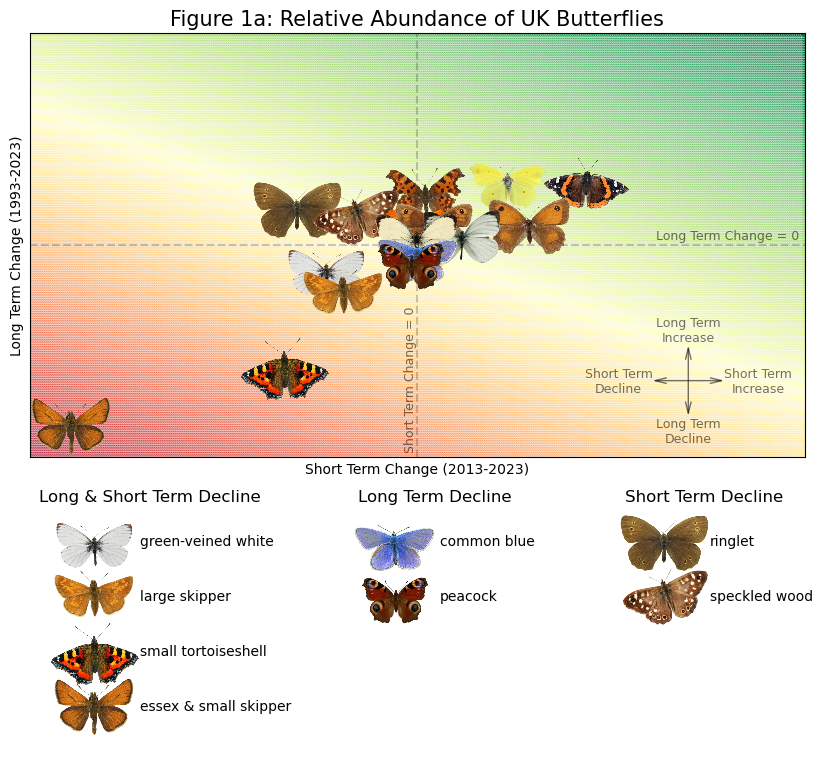

In [26]:
# Plot positioning
leg_sd = fig.add_axes([0.75, # left position
                       -0.15, # bottom position
                       0.1, # width
                       0.5]) # height

# Plot header
leg_sd.set_title('Short Term Decline', # legend title 
                 y=0.33, x=0.5) 
leg_sd.axis('off') # by default plot is created with axis. Must remove.

# Adding images to legend
i=0
for _, row in forecast.iterrows(): # loops through forecast df, looking for name match
    if row['common_name'] in short_decline:
        leg_sd.text(0.55, # x coordinate
                    0.2-(i*0.2), # y coordinate
                    row['common_name'],
                   transform=leg_sd.transAxes) # coordinates relative to legend plot
        i=i+1 # for each new species entry, the y coordinate decreases by 0.2
        
# Adding butterfly names to legend
i=0    
for _, row in forecast.iterrows():
    if row['common_name'] in short_decline:
        # get_Image is used to retrieve butterfly png files using the file address in 
        # the 'forecast' dataframe. From the same dataframe, the abundance values are 
        # used to plot the images on the 'leg_sd' axis.
        leg_pic = AnnotationBbox(get_Image(row['path']),
                                  (0.1, 0.2-(i*0.2)),
                                 frameon=False, # removes image border
                                xycoords='axes fraction') 
        leg_pic.set_label('Short Term Decline') # label added to images matching logic
        leg_sd.add_artist(leg_pic) # leg_pic artist is added to 'leg_sd_decline' axis
        i=i+1

plt.savefig(project_root/'project_pics'/'long_term_vs_short_term.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show() # IF PLOT DOES NOT DISPLAY, RE-RUN MATPLOTLIB CELLS ONE AT A TIME.